In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# read weight-height dataset
weight_height_df = pd.read_csv('weight-height.csv')

In [3]:
weight_height_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
#inch -> cm, lb -> kg
weight_height_df["Height"] = weight_height_df["Height"].apply(lambda x: x * 2.54)
weight_height_df["Weight"] = weight_height_df["Weight"].apply(lambda x: x * 0.4563)

In [5]:
weight_height_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


In [6]:
weight_height_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
weight_height_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.665235
std,9.772721,14.651081
min,137.828359,29.522668
25%,161.304276,61.973777
50%,168.447898,73.561459
75%,175.702625,85.405454
max,200.656806,123.196299


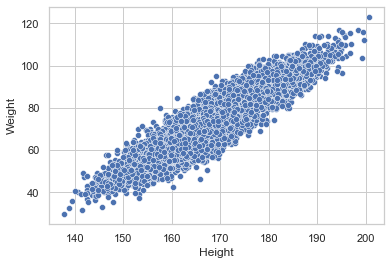

In [10]:
X = weight_height_df["Height"]   # 입력데이터
y = weight_height_df["Weight"]   # 정답데이터
sns.scatterplot(x = X, y = y)
plt.show()


In [11]:
# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
# 선형회귀(Linear Regression) 모델 선언하기
lr = LinearRegression()

In [13]:
# 선형회귀(Linear Regression) 모델 학습하기
# reshape 부분 유의!
lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [14]:
# 테스트 데이터에 대한 예측 수행
y_pred = lr.predict(X_test.values.reshape(-1,1))

In [15]:
y_pred

array([85.30251187, 85.04833252, 70.00433536, ..., 85.00629852,
       80.13183724, 84.18120919])

In [16]:
y_test

2075    88.993878
809     83.116934
5030    64.003695
1736    93.609627
2452    95.873894
          ...    
8449    69.279244
3954    93.273633
1449    89.976988
3252    77.818041
2940    99.887062
Name: Weight, Length: 2000, dtype: float64

In [19]:
# MSE(Mean Squared Error)를 측정
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error) 측정
RMSE = np.sqrt(MSE)

print(f'MSE :{MSE}')
print(f'MSE :{RMSE}')

MSE :30.735252029376458
MSE :5.543938313994525


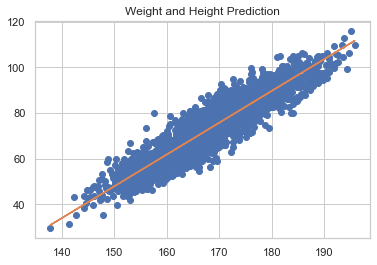

In [20]:
plt.plot(X_test, y_test,'o')
plt.plot(X_test, lr.predict(X_test.values.reshape(-1,1)))
plt.title('Weight and Height Prediction')
plt.show()